# Visualization with Matplotlib

## General Matplotlib Tips

Before we dive into the details of creating visualizations with Matplotlib, there are a few useful things you should know about using the package.

### Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy and the ``pd`` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

The ``plt`` interface is what we will use most often, as we shall see throughout this chapter.

### Setting Styles

We will use the ``plt.style`` directive to choose appropriate styles for our figures.
Here we will set the ``classic`` style, which ensures that the plots we create use the classic Matplotlib style:

In [2]:
plt.style.use('classic')

### ``show()`` or No ``show()``? How to Display Your Plots

#### Plotting from a script

If you are using Matplotlib from within a script, the function ``plt.show()`` is your friend.
``plt.show()`` starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.

So, for example, you may have a file called *myplot.py* containing the following:

```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

You can then run this script from the command-line prompt, which will result in a window opening with your figure displayed:

```
$ python myplot.py
```

The ``plt.show()`` command does a lot under the hood, as it must interact with your system's interactive graphical backend.
The details of this operation can vary greatly from system to system and even installation to installation, but matplotlib does its best to hide all these details from you.

One thing to be aware of: the ``plt.show()`` command should be used *only once* per Python session, and is most often seen at the very end of the script.
Multiple ``show()`` commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided.

#### Plotting from an IPython shell

It can be very convenient to use Matplotlib interactively within an IPython shell.
IPython is built to work well with Matplotlib if you specify Matplotlib mode.
To enable this mode, you can use the ``%matplotlib`` magic command after starting ``ipython``:

```ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```

At this point, any ``plt`` plot command will cause a figure window to open, and further commands can be run to update the plot.
Some changes (such as modifying properties of lines that are already drawn) will not draw automatically: to force an update, use ``plt.draw()``.
Using ``plt.show()`` in Matplotlib mode is not required.

#### Plotting from an IPython notebook

The IPython notebook is a browser-based interactive data analysis tool that can combine narrative, code, graphics, HTML elements, and much more into a single executable document (see [IPython: Beyond Normal Python](01.00-IPython-Beyond-Normal-Python.ipynb)).

Plotting interactively within an IPython notebook can be done with the ``%matplotlib`` command, and works in a similar way to the IPython shell.
In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

- ``%matplotlib notebook`` will lead to *interactive* plots embedded within the notebook
- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

For this tutorial, we will generally opt for ``%matplotlib inline``:

In [ ]:
%matplotlib inline
#%matplotlib notebook

After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

In [4]:
import numpy as np
x = np.linspace(0, 10, 100)

#create a containter of figures
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

<IPython.core.display.Javascript object>

### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:

In [5]:
fig.savefig('my_figure.png')

We now have a file called ``my_figure.png`` in the current working directory:

In [6]:
# !ls -lh my_figure.png
!dir my_figure.png


 Volume in drive C is Windows-SSD
 Volume Serial Number is 1E5A-7E57

 Directory of c:\Users\Jie Mao\Desktop\TA-DDA5001 material\Tutorial1-3\Tutorial2_Preceptron

2025/09/16  15:46            39,032 my_figure.png
               1 File(s)         39,032 bytes
               0 Dir(s)  184,409,284,608 bytes free


To confirm that it contains what we think it contains, let's use the IPython ``Image`` object to display the contents of this file:

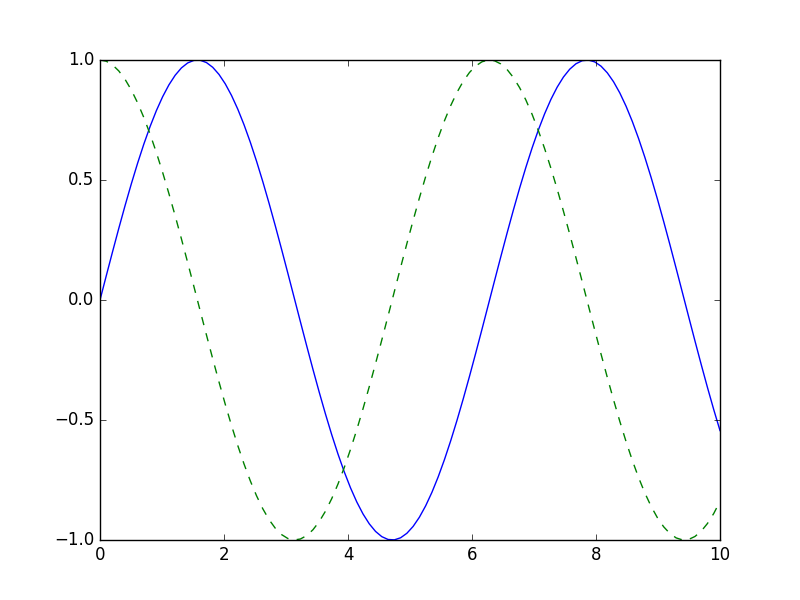

In [7]:
from IPython.display import Image
Image('my_figure.png')

In ``savefig()``, the file format is inferred from the extension of the given filename.
Depending on what backends you have installed, many different file formats are available.
The list of supported file types can be found for your system by using the following method of the figure canvas object:

In [8]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

Note that when saving your figure, it's not necessary to use ``plt.show()`` or related commands discussed earlier.

## Two Interfaces for the Price of One

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We'll quickly highlight the differences between the two here.

#### MATLAB-style Interface

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact.
The MATLAB-style tools are contained in the pyplot (``plt``) interface.
For example, the following code will probably look quite familiar to MATLAB users:

In [9]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

<IPython.core.display.Javascript object>

It is important to note that this interface is *stateful*: it keeps track of the "current" figure and axes, which are where all ``plt`` commands are applied.
You can get a reference to these using the ``plt.gcf()`` (get current figure) and ``plt.gca()`` (get current axes) routines.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems.
For example, once the second panel is created, how can we go back and add something to the first?
This is possible within the MATLAB-style interface.
Fortunately, there is a better way.

#### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure.
Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are *methods* of explicit ``Figure`` and ``Axes`` objects.
To re-create the previous plot using this style of plotting, you might do the following:

In [10]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

<IPython.core.display.Javascript object>

Throughout this chapter, we will switch between the MATLAB-style and object-oriented interfaces, depending on what is most convenient.
In most cases, the difference is as small as switching ``plt.plot()`` to ``ax.plot()``, but there are a few problems that we will highlight as they come up in the following sections.

# Simple Line Plots

Perhaps the simplest of all plots is the visualization of a single function $y = f(x)$.
Here we will take a first look at creating a simple plot of this type.
As with all the following sections, we'll start by setting up the notebook for plotting and  importing the packages we will use:

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("whitegrid") 
plt.style.use('default')
import numpy as np

For all Matplotlib plots, we start by creating a figure and an axes.
In their simplest form, a figure and axes can be created as follows:

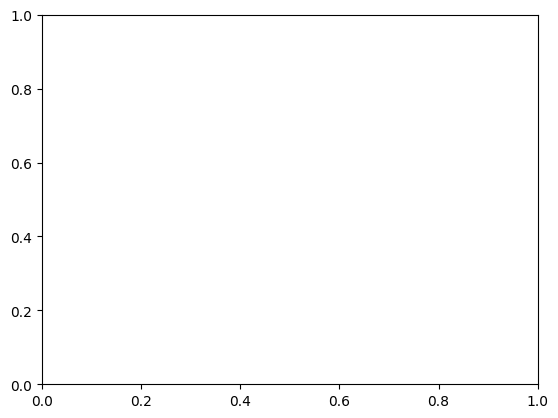

In [39]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the *figure* (an instance of the class ``plt.Figure``) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.
The *axes* (an instance of the class ``plt.Axes``) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization.
We'll commonly use the variable name ``fig`` to refer to a figure instance, and ``ax`` to refer to an axes instance or group of axes instances.

Once we have created an axes, we can use the ``ax.plot`` function to plot some data. Let's start with a simple sinusoid:

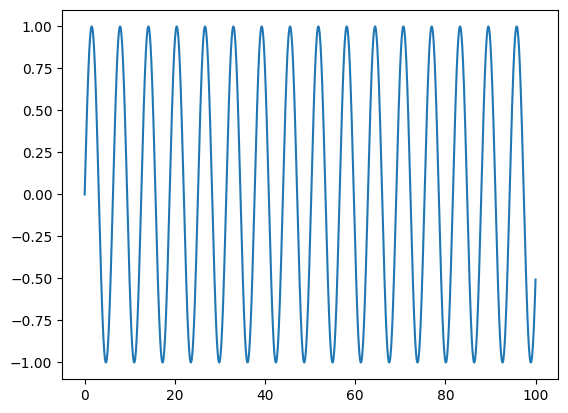

In [40]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 100, 10000) # ranging from 0-100, 10000 points in total.
ax.plot(x, np.sin(x));

Alternatively, we can use the pylab interface and let the figure and axes be created for us in the background
(see [Two Interfaces for the Price of One](04.00-Introduction-To-Matplotlib.ipynb#Two-Interfaces-for-the-Price-of-One) for a discussion of these two interfaces):

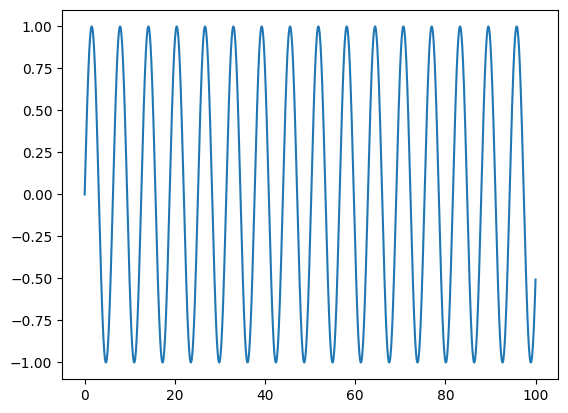

In [14]:
plt.plot(x, np.sin(x));

If we want to create a single figure with multiple lines, we can simply call the ``plot`` function multiple times:

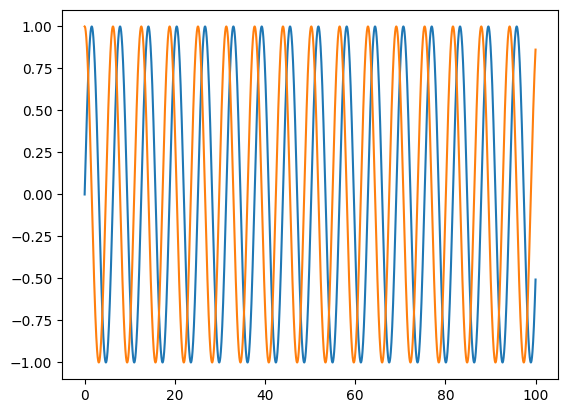

In [15]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

That's all there is to plotting simple functions in Matplotlib!
We'll now dive into some more details about how to control the appearance of the axes and lines.

## Adjusting the Plot: Line Colors and Styles

The first adjustment you might wish to make to a plot is to control the line colors and styles.
The ``plt.plot()`` function takes additional arguments that can be used to specify these.
To adjust the color, you can use the ``color`` keyword, which accepts a string argument representing virtually any imaginable color.
The color can be specified in a variety of ways:

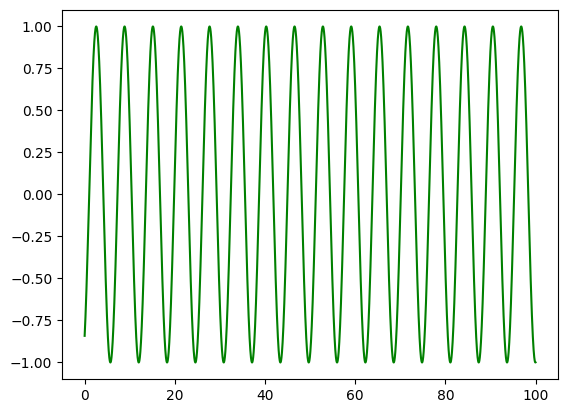

In [42]:
# plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
# # plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
# # plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
# # plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
# # plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

Similarly, the line style can be adjusted using the ``linestyle`` keyword:

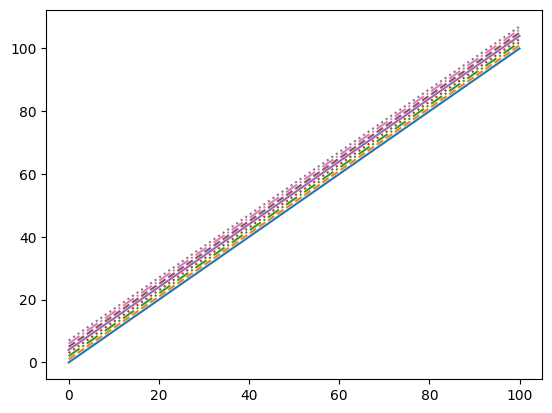

In [17]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

If you would like to be extremely terse, these ``linestyle`` and ``color`` codes can be combined into a single non-keyword argument to the ``plt.plot()`` function:

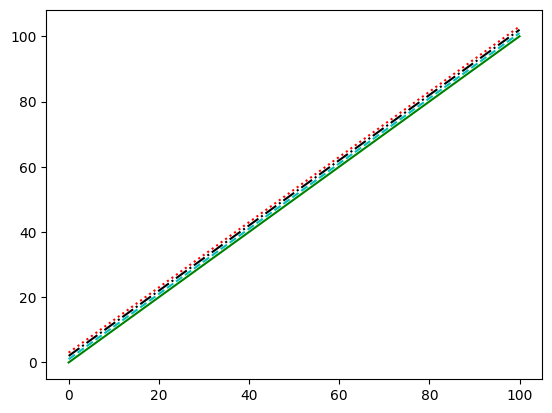

In [18]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

There are many other keyword arguments that can be used to fine-tune the appearance of the plot; for more details, I'd suggest viewing the docstring of the ``plt.plot()`` function using IPython's help tools (See [Help and Documentation in IPython](01.01-Help-And-Documentation.ipynb)).

## Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.
The most basic way to adjust axis limits is to use the ``plt.xlim()`` and ``plt.ylim()`` methods:

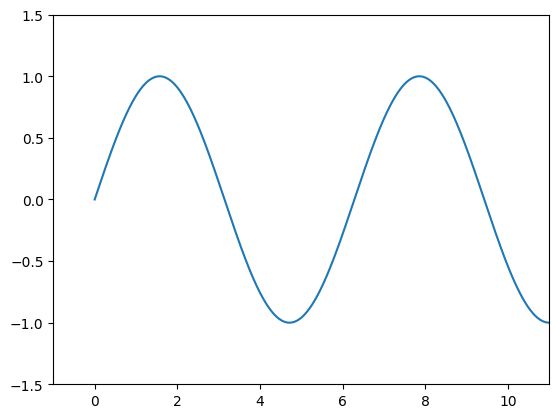

In [19]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

If for some reason you'd like either axis to be displayed in reverse, you can simply reverse the order of the arguments:

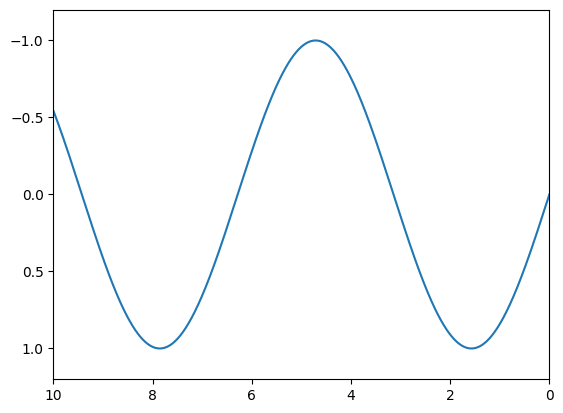

In [20]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

The ``plt.axis()`` method allows you to set the ``x`` and ``y`` limits with a single call, by passing a list which specifies ``[xmin, xmax, ymin, ymax]``:

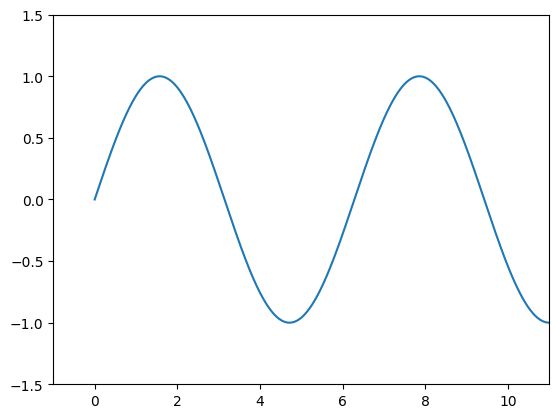

In [21]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

The ``plt.axis()`` method goes even beyond this, allowing you to do things like automatically tighten the bounds around the current plot:

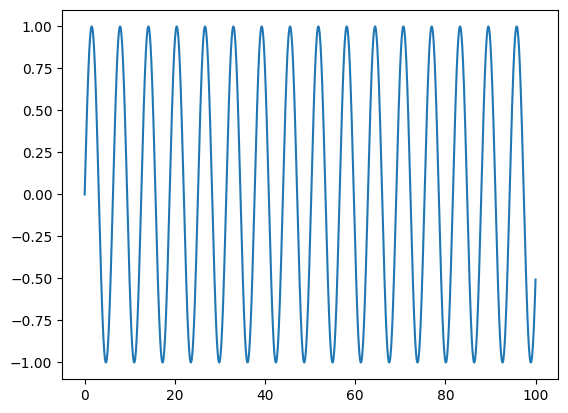

In [44]:
plt.plot(x, np.sin(x))
plt.axis('tight');

It allows even higher-level specifications, such as ensuring an equal aspect ratio so that on your screen, one unit in ``x`` is equal to one unit in ``y``:

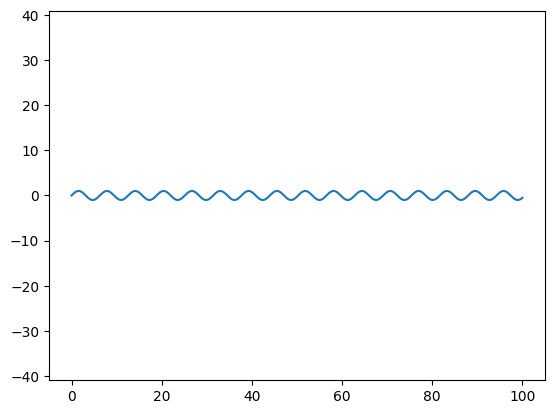

In [46]:
plt.plot(x, np.sin(x))
plt.axis('equal');

For more information on axis limits and the other capabilities of the ``plt.axis`` method, refer to the ``plt.axis`` docstring.

## Labeling Plots

As the last piece of this section, we'll briefly look at the labeling of plots: titles, axis labels, and simple legends.

Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them:

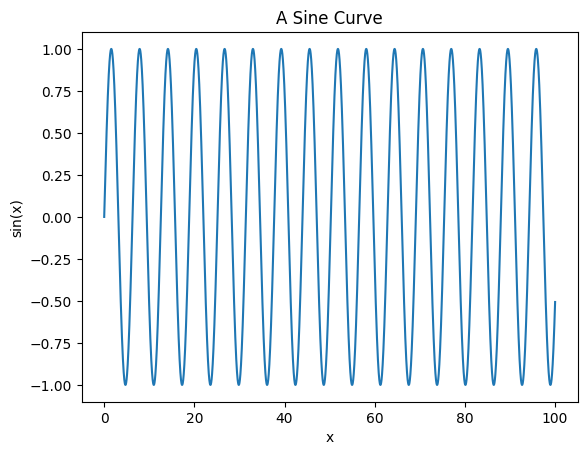

In [48]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

The position, size, and style of these labels can be adjusted using optional arguments to the function.
For more information, see the Matplotlib documentation and the docstrings of each of these functions.

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type.
Again, Matplotlib has a built-in way of quickly creating such a legend.
It is done via the ``plt.legend()`` method.
Though there are several valid ways of using this, I find it easiest to specify the label of each line using the ``label`` keyword of the plot function:

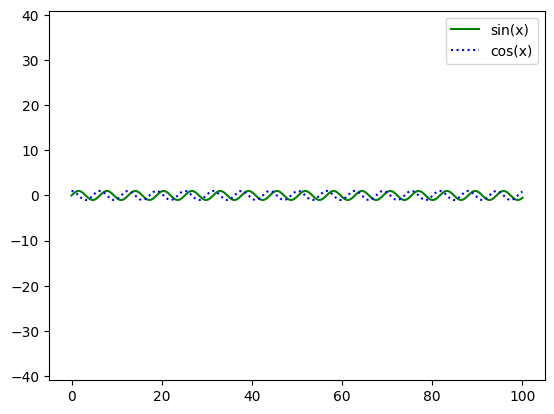

In [50]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

As you can see, the ``plt.legend()`` function keeps track of the line style and color, and matches these with the correct label.

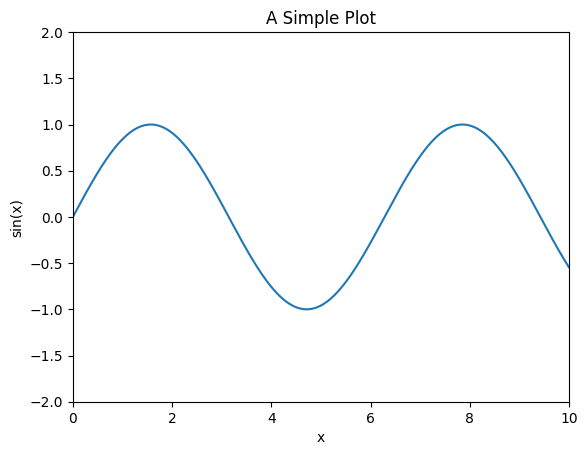

In [26]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

# Perceptron Example

Import Packages we need

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import gridspec

### First Let's create some data
- Class 1 around (1,1)
- Class 2 around (3,3)

u can also try different setting, see how it work

In [52]:
# Generate points for class 1 centered around (1, 1)
class_1_x1 = np.random.randn(50) * 0.5 + 1  # Class 1 points centered around x1 = 1
class_1_x2 = np.random.randn(50) * 0.5 + 1  # Class 1 points centered around x2 = 1

# Generate points for class 2 centered around (3, 3)
class_2_x1 = np.random.randn(50) * 0.5 + 3  # Class 2 points centered around x1 = 3
class_2_x2 = np.random.randn(50) * 0.5 + 3  # Class 2 points centered around x2 = 3

# Stack the features vertically for both classes, making sure each row is a feature point
x1 = np.concatenate([class_1_x1, class_2_x1]).reshape(-1, 1)  # Combine and reshape to column vector
x2 = np.concatenate([class_1_x2, class_2_x2]).reshape(-1, 1)  # Combine and reshape to column vector
print(x1.shape)
print(x2.shape)

# Create labels for the two classes
labels = np.array([1] * 50 + [-1] * 50).reshape(-1, 1)  # 1 for class 1, -1 for class 2
print(labels.shape)

# Combine features and labels
data_with_labels = np.hstack([x1, x2, labels])  # Horizontal stacking of features and labels

# Check the shape of the resulting array
print("Data with labels shape:", data_with_labels.shape)

(100, 1)
(100, 1)
(100, 1)
Data with labels shape: (100, 3)


### Set up the model parameters

In [ ]:
# Parameters
learningRate = 0.1
maxIterations = 100
threshold = 0
num_features = data_with_labels.shape[1] - 1  # Exclude the label column

# Initialize weights and bias
weights = np.zeros(num_features + 1)  # Include one more for the bias term
bias = 1

### Prepare data: separate features and labels

In [54]:
# Prepare data: separate features and labels
X = np.hstack((np.ones((data_with_labels.shape[0], 1)), data_with_labels[:, :-1]))  # Add bias term to X
y = data_with_labels[:, -1]  # Labels (last column)
print(X.shape)

(100, 3)


### Train Now!

In [55]:
errors_log = []  # To log errors over iterations
for iteration in range(maxIterations):
    total_error = 0
    for i in range(len(X)):
        
        current_X = X[i]
        prediction = np.dot(current_X, weights)
        f = np.sign(prediction - threshold)

        # Update weights if there is an error
        
        if f != y[i]:
            error = y[i] - f
            weights += learningRate * error * current_X
            total_error += abs(error)
    
            

    errors_log.append(total_error)

    # Stop early if no errors
    if total_error == 0:
        break

### Plot Convergence figure

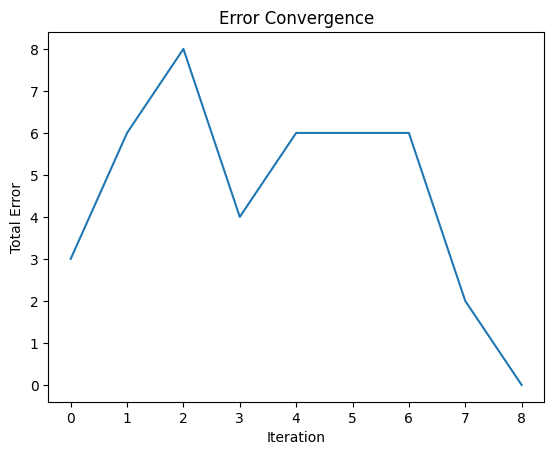

Final weights: [-0.47628114 -0.16117826]
Bias term: 1.2999999999999998


In [56]:
# Plot errors over iterations
plt.plot(errors_log)
plt.xlabel('Iteration')
plt.ylabel('Total Error')
plt.title('Error Convergence')
plt.show()

# Output final weights and bias
print(f"Final weights: {weights[1:]}")
print(f"Bias term: {weights[0]}")

### Plot Decision Boundary

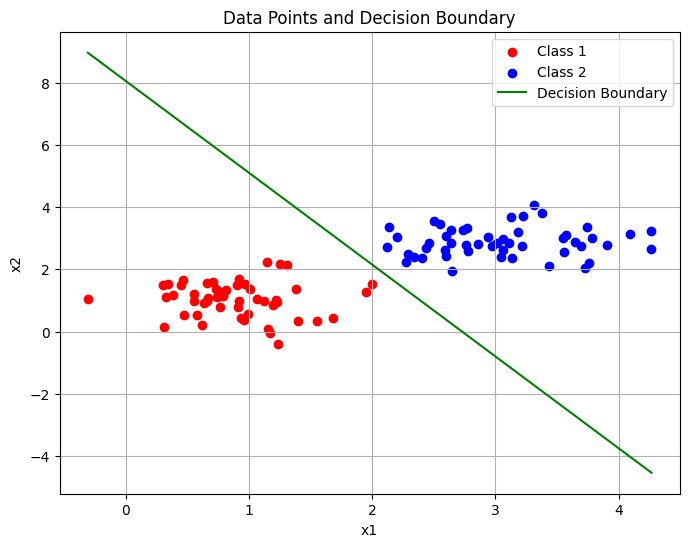

In [57]:
# Plot the data points and decision boundary
plt.figure(figsize=(8, 6))

# Scatter plot for class 1
plt.scatter(class_1_x1, class_1_x2, color='red', label='Class 1')
# Scatter plot for class 2
plt.scatter(class_2_x1, class_2_x2, color='blue', label='Class 2')

# Decision boundary: w1 * x1 + w2 * x2 + w0 = 0 -> x2 = -(w1/w2)*x1 - b/w2
x_vals = np.linspace(min(x1), max(x1), 100)  # Generate 100 points along x1 axis
decision_boundary = -(weights[1] / weights[2]) * x_vals - (weights[0] / weights[2])

# Plot decision boundary
plt.plot(x_vals, decision_boundary, color='green', label='Decision Boundary')

# Add labels and legend
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data Points and Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()